# Train Data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv',index_col=0)

In [3]:
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             8.0              0.50         0.39             2.2      0.073   
1             9.3              0.30         0.73             2.3      0.092   
2             7.1              0.51         0.03             2.1      0.059   
3             8.1              0.87         0.22             2.6      0.084   
4             8.5              0.36         0.30             2.3      0.079   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  30.0                  39.0  0.99572  3.33       0.77   
1                  30.0                  67.0  0.99854  3.32       0.67   
2                   3.0                  12.0  0.99660  3.52       0.73   
3                  11.0                  65.0  0.99730  3.20       0.53   
4                  10.0                  45.0  0.99444  3.20       1.36   

    alcohol  quality  
Id                    
0      12.1        6  
1      12.8        6  
2      11.3        7  
3       9.8        5  
4       9.5        6

In [ ]:
# train.describe(include='all').fillna('-')

In [4]:
X,Y=train.iloc[:,:-1],train.quality

In [5]:
Y.value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

# Distribution

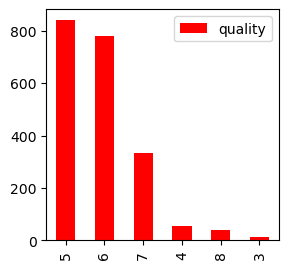

In [6]:
x=pd.DataFrame(Y.value_counts())
x.plot(kind='bar',label=True,color=['red'],figsize=(3,3))
plt.show()

In [7]:
import plotly.express as exp

fig=exp.bar(data_frame=x,x=x.index,y=x.quality,width=400, height=250)
fig.update_layout(xaxis=dict(title='Class'),hovermode='x')


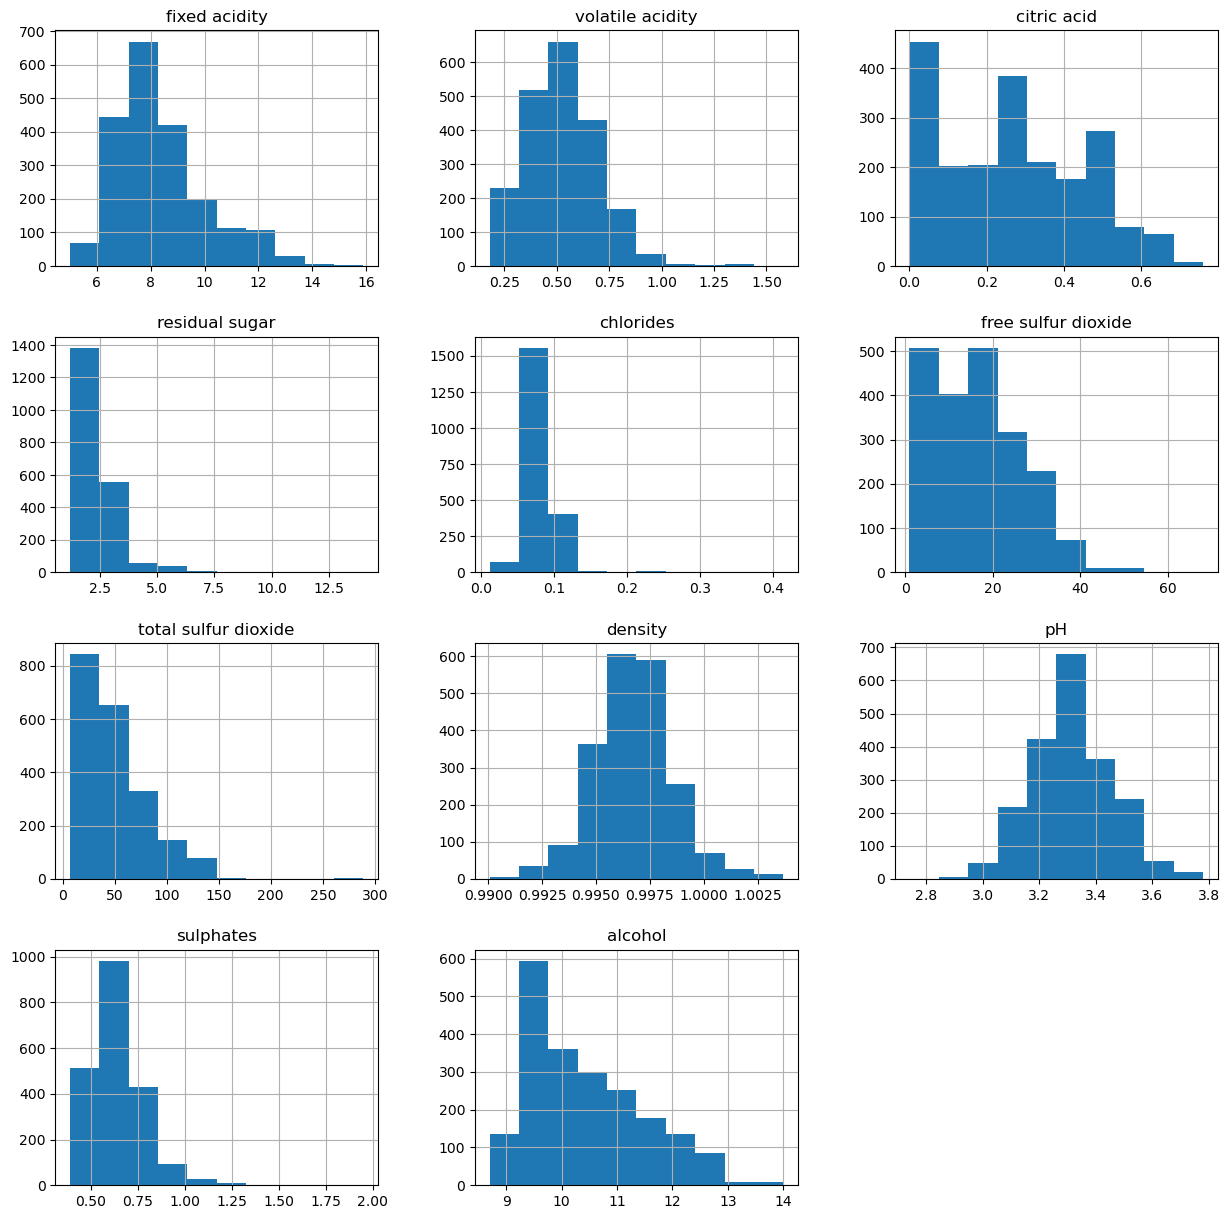

In [8]:
X.hist(figsize=(15,15))
plt.show()

# Outlier Detection

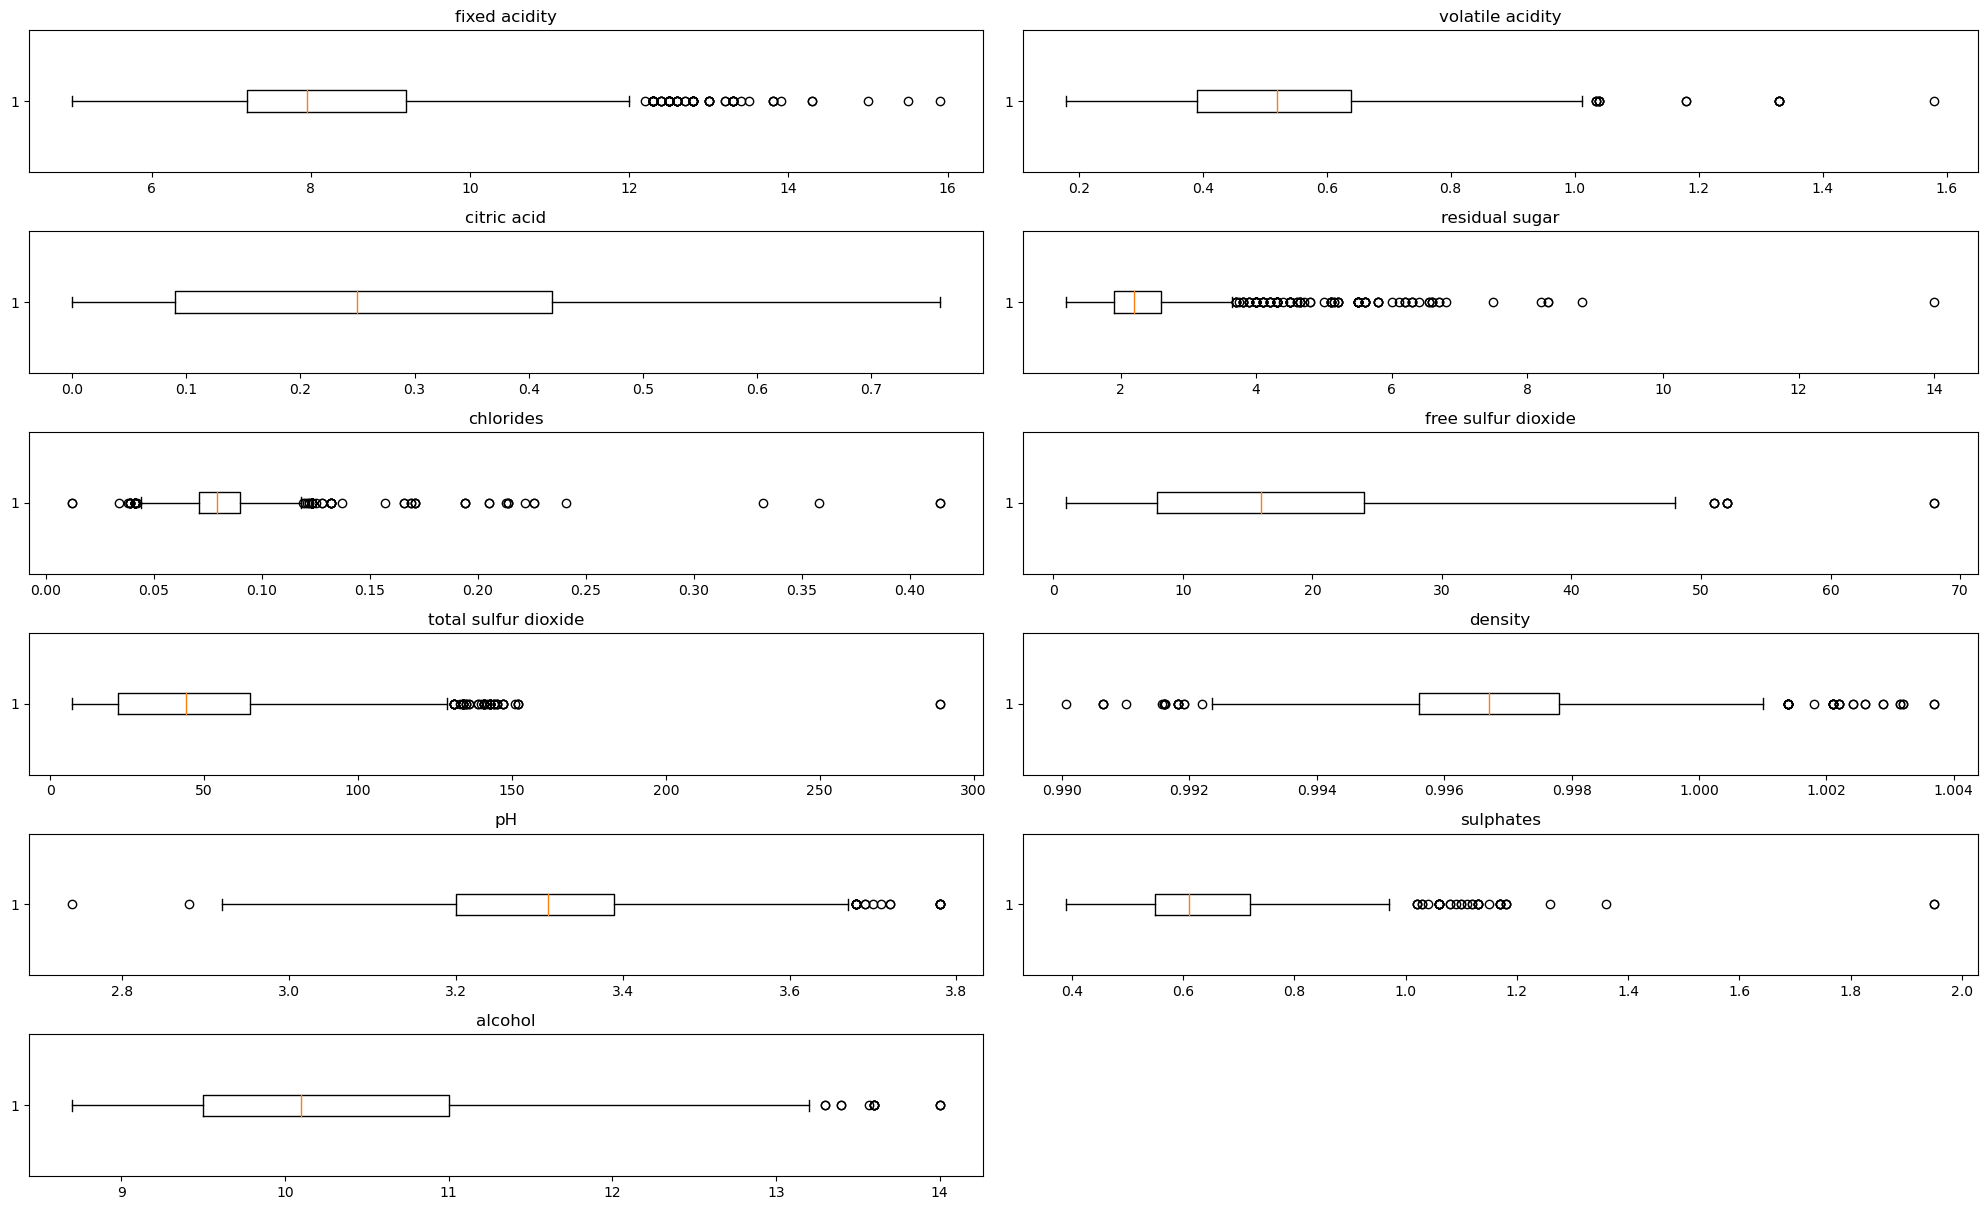

In [9]:
plt.figure(figsize=(20,20))

out={}
x=1

for i,j in enumerate(X.columns):
  if X[j].dtypes!='O':
    plt.subplot(10,2,x)
    box=plt.boxplot(X[j],vert=False)
    outlier=[item.get_ydata() for item in box['fliers']]
    out[j]=outlier
    plt.title(j)
    x+=1
plt.tight_layout()

In [10]:
from sklearn.ensemble import IsolationForest

iso=IsolationForest()

X['Anomaly']=iso.fit_predict(X)
pos=list(X[X['Anomaly']==-1].index)

X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             8.0              0.50         0.39             2.2      0.073   
1             9.3              0.30         0.73             2.3      0.092   
2             7.1              0.51         0.03             2.1      0.059   
3             8.1              0.87         0.22             2.6      0.084   
4             8.5              0.36         0.30             2.3      0.079   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  30.0                  39.0  0.99572  3.33       0.77   
1                  30.0                  67.0  0.99854  3.32       0.67   
2                   3.0                  12.0  0.99660  3.52       0.73   
3                  11.0                  65.0  0.99730  3.20       0.53   
4                  10.0                  45.0  0.99444  3.20       1.36   

    alcohol  Anomaly  
Id                    
0      12.1        1  
1      12.8       -1  
2      11.3        1  
3       9.8        1  
4       9.5        1

In [11]:
X['Anomaly'].value_counts()

 1    1917
-1     139
Name: Anomaly, dtype: int64

In [12]:
# drping outliers and reset index
train2=train.copy()
train2.drop(pos,inplace=True)
train2.reset_index(inplace=True)
train2.index.name='Id'
train2.drop('Id',axis=1,inplace=True)
train2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             8.0              0.50         0.39             2.2      0.073   
1             7.1              0.51         0.03             2.1      0.059   
2             8.1              0.87         0.22             2.6      0.084   
3             8.5              0.36         0.30             2.3      0.079   
4             9.9              0.51         0.44             2.2      0.111   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  30.0                  39.0  0.99572  3.33       0.77   
1                   3.0                  12.0  0.99660  3.52       0.73   
2                  11.0                  65.0  0.99730  3.20       0.53   
3                  10.0                  45.0  0.99444  3.20       1.36   
4                  30.0                 134.0  0.99820  3.11       0.54   

    alcohol  quality  
Id                    
0      12.1        6  
1      11.3        7  
2       9.8        5  
3       9.5        6  
4       9.6        5

In [13]:
print('Before ',train.shape)
print(f'After {train2.shape}')

Before  (2056, 12)
After (1917, 12)


In [14]:
train2.reset_index(inplace=True)
train2.index.name='Id'
train2.drop('Id',axis=1,inplace=True)
train2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             8.0              0.50         0.39             2.2      0.073   
1             7.1              0.51         0.03             2.1      0.059   
2             8.1              0.87         0.22             2.6      0.084   
3             8.5              0.36         0.30             2.3      0.079   
4             9.9              0.51         0.44             2.2      0.111   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  30.0                  39.0  0.99572  3.33       0.77   
1                   3.0                  12.0  0.99660  3.52       0.73   
2                  11.0                  65.0  0.99730  3.20       0.53   
3                  10.0                  45.0  0.99444  3.20       1.36   
4                  30.0                 134.0  0.99820  3.11       0.54   

    alcohol  quality  
Id                    
0      12.1        6  
1      11.3        7  
2       9.8        5  
3       9.5        6  
4       9.6        5

# Skewness removal

In [15]:
X.skew()

fixed acidity           0.959832
volatile acidity        0.668343
citric acid             0.246571
residual sugar          3.756802
chlorides               5.262627
free sulfur dioxide     0.681219
total sulfur dioxide    1.267906
density                 0.202606
pH                      0.216976
sulphates               1.802854
alcohol                 0.786872
Anomaly                -3.446913
dtype: float64

In [16]:
# Skewness removal`
train3=train2.copy()

In [17]:
train3.skew()

fixed acidity           0.963426
volatile acidity        0.598151
citric acid             0.255216
residual sugar          2.157563
chlorides               3.032740
free sulfur dioxide     0.602910
total sulfur dioxide    0.981725
density                 0.156167
pH                      0.201358
sulphates               1.111888
alcohol                 0.832823
quality                 0.265542
dtype: float64

In [18]:
X,Y=train3.iloc[:,:-1],train3[['quality']]

In [19]:
X_transformed=pd.DataFrame(np.sqrt(X),columns=X.columns)
X_transformed.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0        2.828427          0.707107     0.624500        1.483240   0.270185   
1        2.664583          0.714143     0.173205        1.449138   0.242899   
2        2.846050          0.932738     0.469042        1.612452   0.289828   
3        2.915476          0.600000     0.547723        1.516575   0.281069   
4        3.146427          0.714143     0.663325        1.483240   0.333167   

    free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
Id                                                                             
0              5.477226              6.244998  0.997858  1.824829   0.877496   
1              1.732051              3.464102  0.998299  1.876166   0.854400   
2              3.316625              8.062258  0.998649  1.788854   0.728011   
3              3.162278              6.708204  0.997216  1.788854   1.166190   
4              5.477226             11.575837  0.999100  1.763519   0.734847   

     alcohol  
Id            
0   3.478505  
1   3.361547  
2   3.130495  
3   3.082207  
4   3.098387

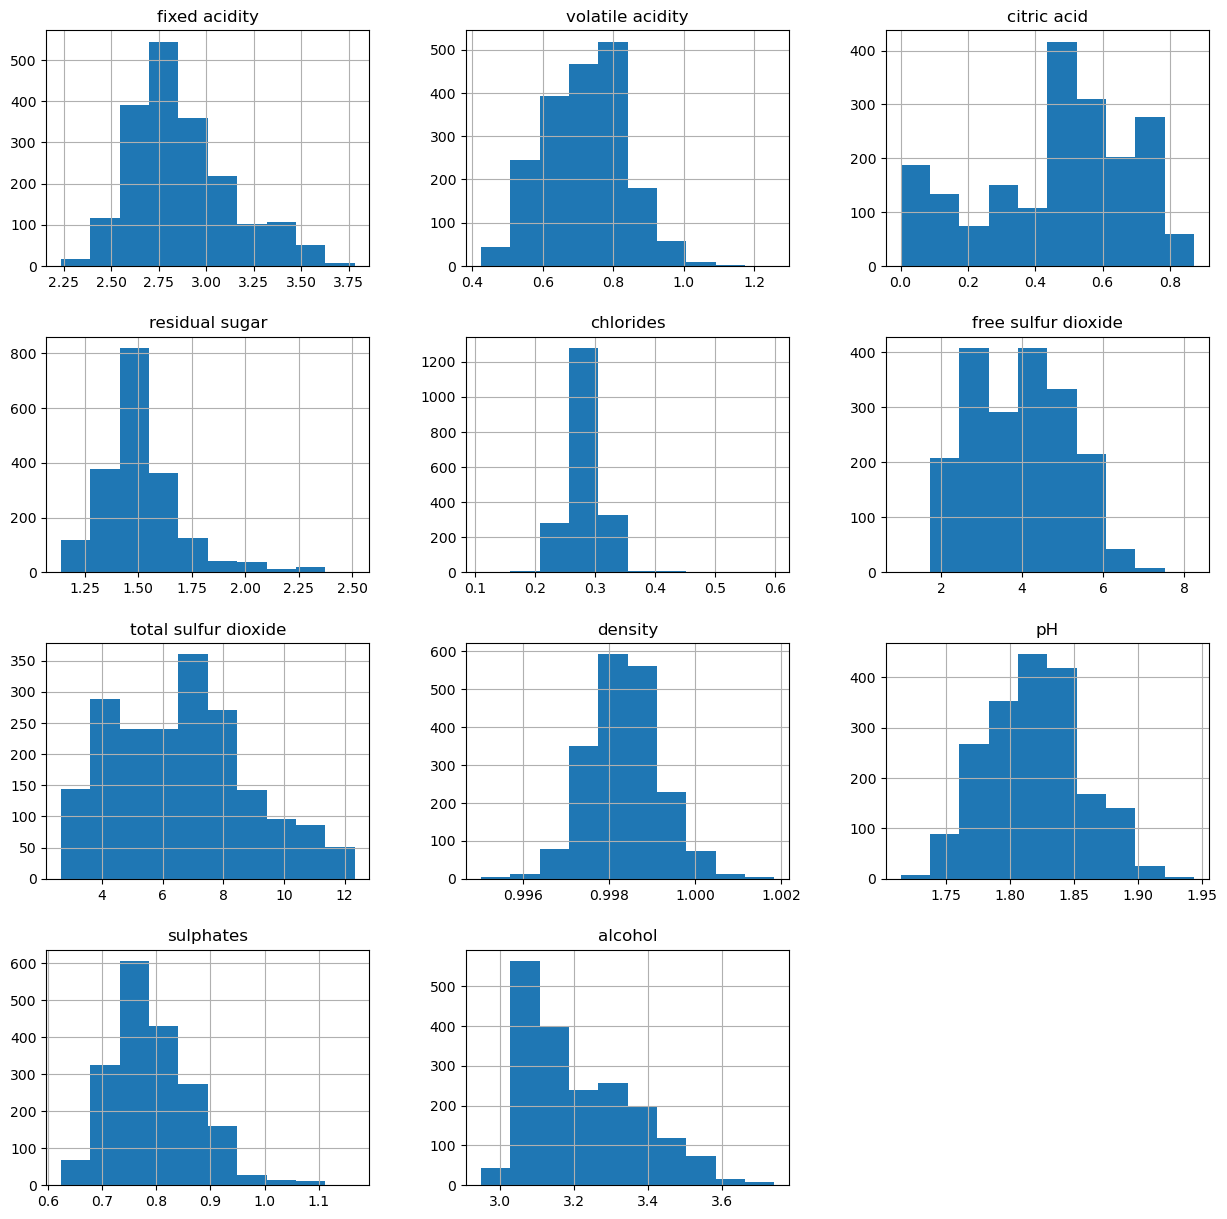

In [20]:
X_transformed.hist(figsize=(15,15))
plt.show()

In [21]:
X_transformed.skew()

fixed acidity           0.746101
volatile acidity        0.105408
citric acid            -0.619652
residual sugar          1.502325
chlorides               1.022943
free sulfur dioxide     0.068612
total sulfur dioxide    0.372393
density                 0.152926
pH                      0.149330
sulphates               0.788372
alcohol                 0.749097
dtype: float64

# Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
np.unique(Y,return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([ 12,  52, 798, 724, 298,  33], dtype=int64))

# Class Imbalance

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
# Generating synthetic data using SMOTE
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X_transformed, Y)

In [38]:
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

In [39]:
np.unique(y_resampled,return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([798, 798, 798, 798, 798, 798], dtype=int64))

In [ ]:
x=y_resampled.value_counts()

In [ ]:
import plotly.express as exp

fig=exp.bar(data_frame=x,x=x.index,y=x.values,width=400, height=250)
fig.update_layout(xaxis=dict(title='Class'),hovermode='x')


## DBSCAN noisy points

In [ ]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN()

In [ ]:
dbscan.fit(X_transformed)
# x_scl['Group']=dbscan.fit_predict(x_scl)
# x_scl.head()

In [ ]:
# x_scl.Group.value_counts()
# # Overall DBSACN useless

In [ ]:
# x_scl.drop('Group',axis=1,inplace=True)
# x_scl.head()

# DR

## TSNE

In [ ]:
reduction_data=X_transformed.copy()

In [41]:
from sklearn.manifold import TSNE

In [42]:
tsne=TSNE()
tsne_df=pd.DataFrame(tsne.fit_transform(X_resampled),columns=['a','b'])

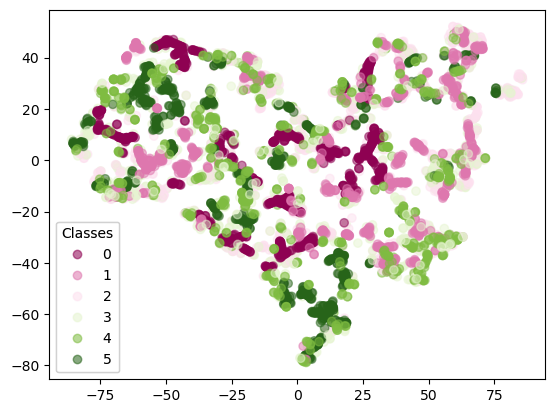

In [52]:
# Distribution
fig, ax = plt.subplots()

scatter = ax.scatter(tsne_df.a, tsne_df.b, c=y_resampled,alpha=.5,cmap='PiYG')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# # produce a legend with a cross section of sizes from the scatter
# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

In [55]:
# On scaled Data
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_scl=pd.DataFrame(std.fit_transform(X_resampled),columns=X_resampled.columns)
x_scl.shape

(4788, 11)

In [56]:
tsne=TSNE()
tsne_df2=pd.DataFrame(tsne.fit_transform(x_scl),columns=['a','b'])

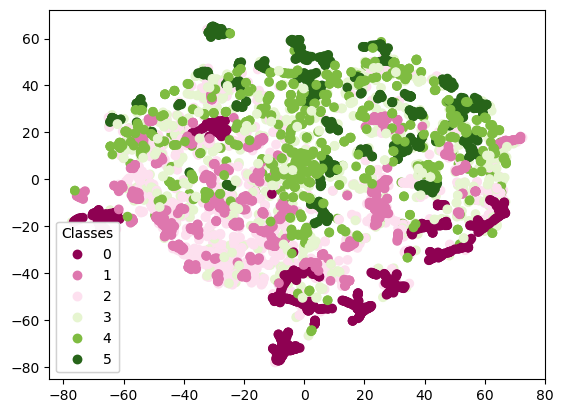

In [59]:

fig, ax = plt.subplots()

scatter = ax.scatter(tsne_df2.a, tsne_df2.b, c=y_resampled,alpha=1,cmap='PiYG')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# # produce a legend with a cross section of sizes from the scatter
# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

## Feature selection

In [ ]:
reduction_data

In [60]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

In [ ]:
X_resampled.columns

In [ ]:
dtc.feature_importances_

In [ ]:
X_transformed.columns

## PCA

In [61]:
from sklearn.decomposition import PCA

pca=PCA()

In [62]:
pca.fit(X_resampled)

PCA()

In [63]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)

In [64]:
import numpy as np

np.cumsum(pca.explained_variance_ratio_)

array([0.89126515, 0.97076369, 0.98566973, 0.9906508 , 0.99520591,
       0.99795112, 0.99902165, 0.99971737, 0.9999074 , 0.99999995,
       1.        ])

In [65]:
pcs=PCA(2)
final_X=pd.DataFrame(pcs.fit_transform(X_resampled),columns=('PC1','PC2'))

In [66]:
final_X

PC1       PC2
0     0.663477 -1.514170
1    -3.468187  0.538621
2     1.349533  1.216597
3     0.059630  0.764851
4     5.439077  0.890004
...        ...       ...
4783 -2.893357 -0.000478
4784 -2.806309  0.191275
4785  1.186335 -1.608177
4786  2.108464 -1.775239
4787 -0.457312  0.031095

[4788 rows x 2 columns]

# Model Building

## XGB

In [67]:
from xgboost import XGBRFClassifier
xgb=XGBRFClassifier()

In [68]:
y_resampled.shape

(4788,)

In [69]:
final_X.shape

(4788, 2)

In [70]:
from sklearn.model_selection import cross_val_score,KFold
score=cross_val_score(xgb,final_X,y_resampled)

In [71]:
score

array([0.43841336, 0.45093946, 0.45720251, 0.42110763, 0.45454545])

In [72]:
score.mean()

0.44444168122808964

In [74]:
xgb=XGBRFClassifier()
xgb.fit(final_X,y_resampled)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_constraints='', max_bin=256, max_cat_threshold=64,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='multi:softprob',
                predictor='auto', random_state=0, reg_alpha=0, ...)

## Ordinal regression

In [75]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
# mod_prob = OrderedModel(data_diam['cut'],
#                         data_diam[['volume', 'price', 'carat']],
#                         distr='probit')

In [ ]:
OrderedModel()

In [76]:
model=OrderedModel(y_resampled,final_X,distr='logit').fit()

Optimization terminated successfully.
         Current function value: 1.781182
         Iterations: 475
         Function evaluations: 724


In [ ]:
np.argmax([0.001704,0.011631,0.267903,0.436413,0.249827,0.032522])

In [85]:
Class_=[]
for i in probabilities.values:
    print(i)
    Class_.append(np.argmax(i))
    print(np.argmax(i))

[0.12517569 0.13795205 0.15726994 0.17695102 0.19304141 0.2096099 ]
5
[0.14090674 0.149533   0.16353703 0.17572921 0.18240783 0.18788619]
5
[0.22238358 0.19408197 0.17531575 0.15601721 0.13505702 0.11714446]
0
[0.18791818 0.17816329 0.17372642 0.16600631 0.15330444 0.14088137]
0
[0.2709244  0.2102326  0.17206361 0.14071232 0.11341256 0.09265451]
0
[0.14264257 0.150746   0.16412682 0.17551096 0.1812546  0.18571906]
5
[0.15202278 0.15708507 0.16699545 0.17409512 0.17511357 0.17468801]
4
[0.15696164 0.16027916 0.16830141 0.1732067  0.17194769 0.16930339]
3
[0.14454781 0.1520629  0.16475244 0.17525483 0.17999455 0.18338748]
5
[0.27763286 0.21194264 0.17123984 0.13857702 0.11074795 0.08985969]
0
[0.1374937  0.14711092 0.16232092 0.1761142  0.18468897 0.19227129]
5
[0.14824997 0.15457883 0.16590466 0.17471006 0.17756422 0.17899226]
5
[0.22297927 0.19432286 0.17531027 0.1558346  0.13476398 0.11678902]
0
[0.14482868 0.15225575 0.16484276 0.17521564 0.17980932 0.18304784]
5
[0.26598236 0.208895

[0.1265937  0.13904028 0.1579069  0.17690344 0.19207278 0.2074829 ]
5
[0.16449883 0.1649678  0.17004223 0.17168874 0.16721376 0.16158864]
3
[0.13749835 0.14711425 0.16232263 0.17611372 0.18468585 0.1922652 ]
5
[0.14425292 0.15186005 0.16465707 0.17529558 0.18018918 0.1837452 ]
5
[0.14205374 0.15033594 0.16392889 0.17558664 0.18164525 0.18644955]
5
[0.124939   0.13776954 0.15716215 0.17695761 0.19320321 0.2099685 ]
5
[0.12491756 0.137753   0.15715236 0.17695819 0.19321786 0.21000103]
5
[0.15341447 0.157995   0.16737719 0.17385399 0.17421653 0.17314281]
4
[0.14461466 0.15210882 0.16477398 0.17524553 0.17995046 0.18330656]
5
[0.24807426 0.20348329 0.1742457  0.14798478 0.12305915 0.10315283]
0
[0.26618394 0.20895136 0.17259856 0.14222279 0.11533994 0.09470342]
0
[0.16524515 0.16542004 0.17019875 0.17152877 0.16675164 0.16085566]
3
[0.14141088 0.14988659 0.16371029 0.17566734 0.18207239 0.18725251]
5
[0.1650566  0.16530599 0.17015947 0.17156934 0.16686827 0.16104033]
3
[0.18812952 0.178273

[0.16091116 0.16276374 0.16925046 0.17243415 0.16945204 0.16518844]
3
[0.14253531 0.15067141 0.16409093 0.17552487 0.18132572 0.18585177]
5
[0.14158726 0.15001005 0.16377053 0.1756454  0.18195513 0.18703163]
5
[0.14213125 0.15039    0.16395507 0.17557677 0.1815938  0.18635312]
5
[0.14943906 0.15537498 0.16625739 0.17452254 0.17678892 0.17761711]
5
[0.13818059 0.14760234 0.16257178 0.17604158 0.18422849 0.19137522]
5
[0.14682139 0.15361468 0.16546982 0.17492742 0.17849912 0.18066758]
5
[0.13501985 0.14532436 0.16139142 0.17635461 0.18635281 0.19555695]
5
[0.19511763 0.18182077 0.17439762 0.16404042 0.14927696 0.13534661]
0
[0.14362177 0.15142471 0.16445117 0.17538144 0.18060623 0.18451468]
5
[0.13574098 0.14584785 0.16166662 0.17628801 0.18586695 0.19458959]
5
[0.13482476 0.14518236 0.16131637 0.17637213 0.18648436 0.19582003]
5
[0.17538048 0.17135172 0.17205879 0.16920577 0.16059763 0.15140561]
0
[0.23488396 0.19890567 0.17500012 0.1521428  0.12905827 0.11000918]
0
[0.14921801 0.155227

In [86]:
import numpy as np

probabilities=model.predict(final_X)
predicted_classes = np.argmax(probabilities.values,axis=1) + 1
predicted_classes

array([6, 6, 1, ..., 6, 6, 4], dtype=int64)

In [82]:
max(predicted_classes)

6

In [83]:
model.pred_table()

row_0     0  1    2    3    4     5   All
col_0                                    
0       236  0   33  109   19   401   798
1       271  0   35  179   38   275   798
2       388  0   23  114   32   241   798
3       185  0   15  147   36   415   798
4       154  0   31  115   31   467   798
5       104  0   15  108   23   548   798
All    1338  0  152  772  179  2347  4788

In [90]:
y_resampled,model.predict(final_X)

(array([3, 4, 2, ..., 3, 3, 3], dtype=int64),
              0         1         2         3         4         5
 0     0.125176  0.137952  0.157270  0.176951  0.193041  0.209610
 1     0.140907  0.149533  0.163537  0.175729  0.182408  0.187886
 2     0.222384  0.194082  0.175316  0.156017  0.135057  0.117144
 3     0.187918  0.178163  0.173726  0.166006  0.153304  0.140881
 4     0.270924  0.210233  0.172064  0.140712  0.113413  0.092655
 ...        ...       ...       ...       ...       ...       ...
 4783  0.131725  0.142904  0.160089  0.176621  0.188581  0.200081
 4784  0.137768  0.147307  0.162421  0.176086  0.184505  0.191913
 4785  0.127529  0.139753  0.158319  0.176865  0.191435  0.206100
 4786  0.131737  0.142913  0.160094  0.176620  0.188572  0.200063
 4787  0.157474  0.160605  0.168429  0.173110  0.171622  0.168760
 
 [4788 rows x 6 columns])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

rfc.fit(X,Y)

In [ ]:
rfc.score(X,Y)

# Test Data

In [ ]:
test=pd.read_csv('test.csv',index_col=0)
test.head()

In [ ]:
test_scl=std.transform(test)

In [ ]:
fin=pcs.transform(test_scl)

In [ ]:
# XGB
pred=xgb.predict(fin)

In [ ]:
# RFC
pred=rfc.predict(test)

In [ ]:
pred

In [ ]:
final=le.inverse_transform(pred)

In [ ]:
final

# Submission

In [ ]:
sub=pd.concat((pd.DataFrame(test.index),pd.DataFrame(final,columns=['quality'])),axis=1)
sub.to_csv('sub.csv',index=False)